#### Project :

# MASHROOMS PREDICTION

Introduction:-

Here I will explore the data presented by "GITHUB" for mushroom classification. The goal of this dataset is to classify between edible (e) to poisonous (p) mushrooms. First, I will analyze the data, by showing it's characteristics, and then I will classify it to achieve maximum accuracy and precision.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=cveil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [4]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


#### The data is categorial so I convert it with LabelEncoder to transfer to ordinal.



In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [8]:
df['veil-type'].nunique()

1

From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [9]:
df=df.drop(["veil-type"],axis=1)

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Obserrvation:-
           
           according to upper cell we don't find any null value in data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [12]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

Observation:-
    
             1.As we notice here we have 4208 e(edible) and 3916 e(Poisonous) no of rows present in data.
        
             2. Data is alsmost balance.

# EXPLORATORY DATA ANALYSIS      
             

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


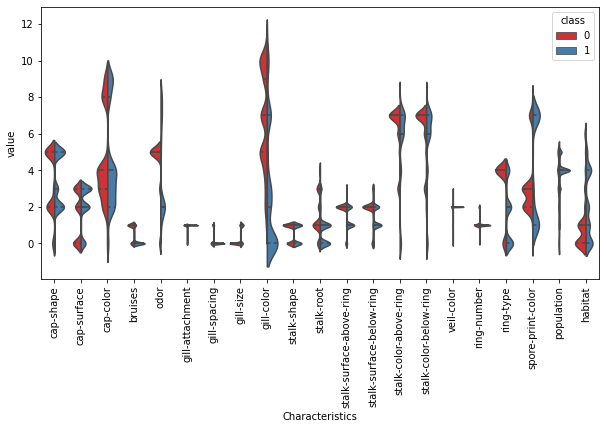

In [15]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

#### The violin plot above represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.



<AxesSubplot:xlabel='class', ylabel='count'>

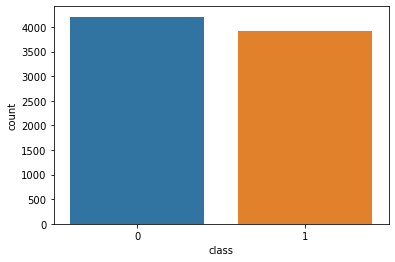

In [16]:
sns.countplot(df['class'])

Observation:-
    
             1.As we notice here we have 4208 e(edible) and 3916 e(Poisonous) no of rows present in data.
        
             2. Data is alsmost balance.

## Correlation matrix

#### Let's look at the correlation between the variables:

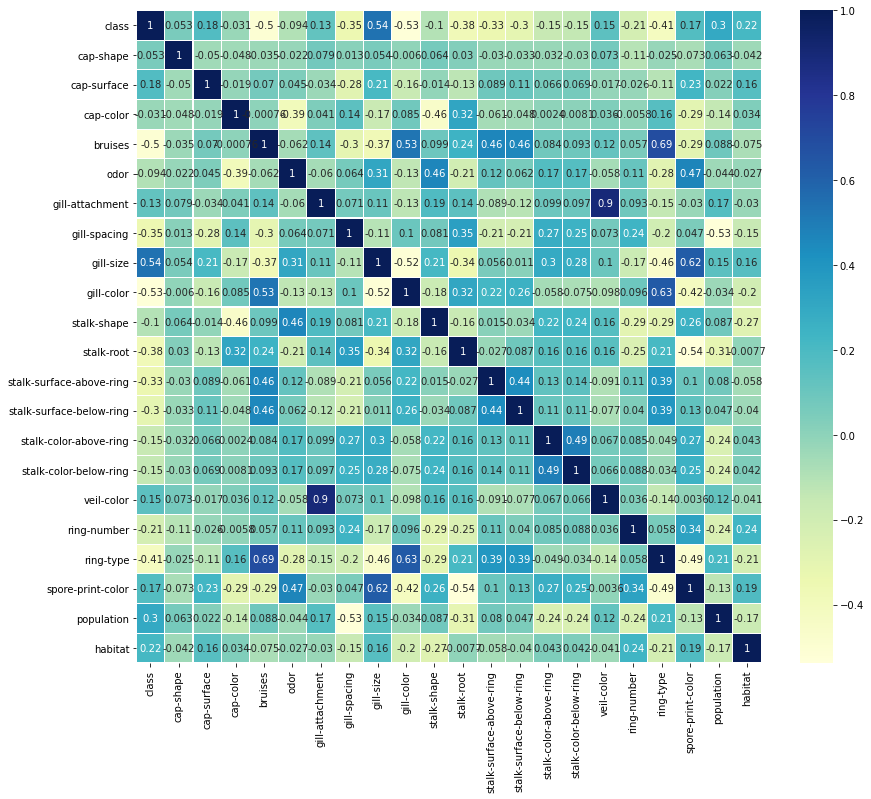

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);


Usually the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely:



In [18]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


#### Lets look closely at the feature "gill-color" :

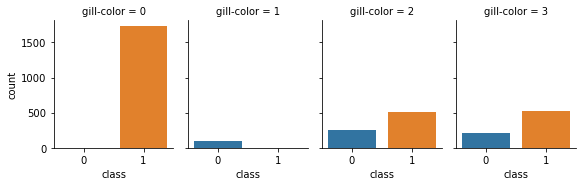

In [19]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

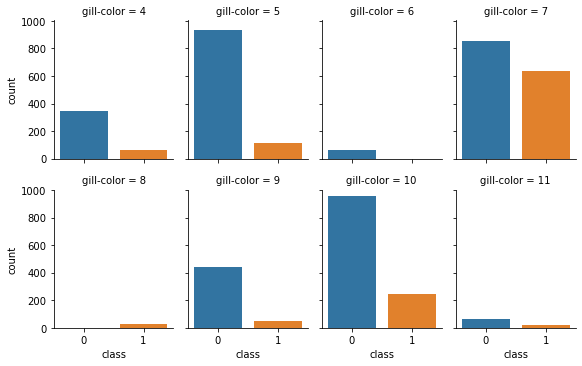

In [20]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

## skewness check

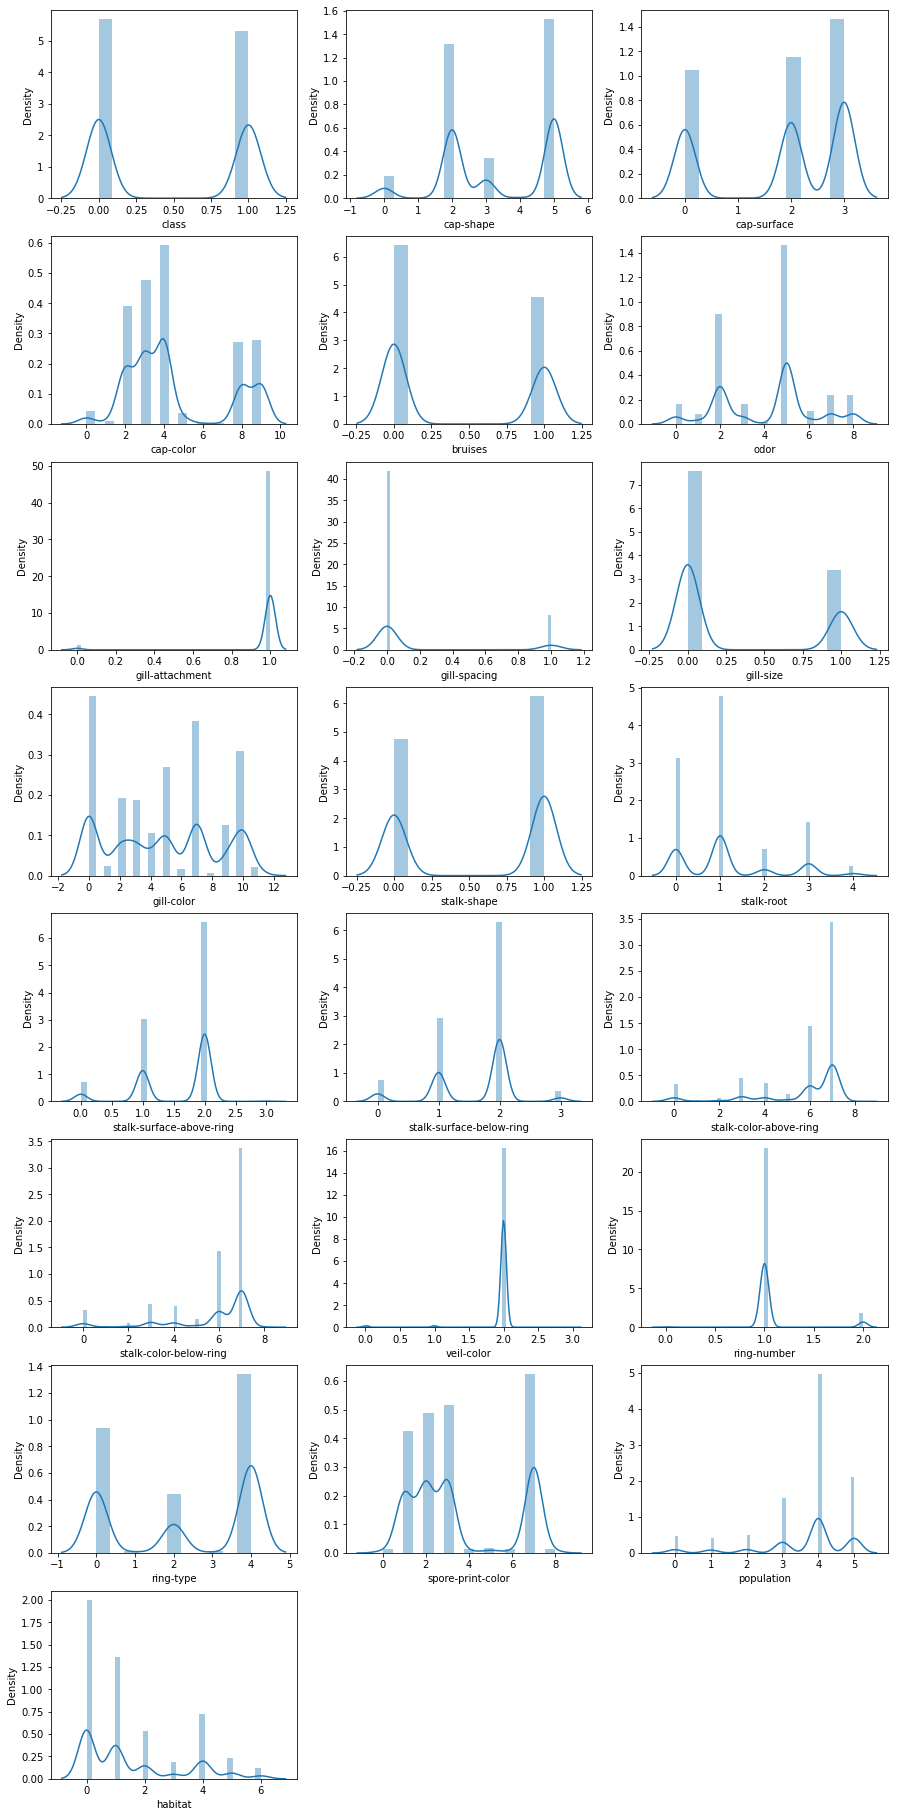

In [21]:
plt.figure(figsize=(15,45))
for i in enumerate(df.columns):
    plt.subplot(11,3,i[0]+1)
    sns.distplot(df[i[1]])
  

In [22]:
print(df.skew())  

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64


Observation:- 
    
               we can see in above cell some of columns are skewed in data 

In [23]:
import numpy as np
from scipy.stats import zscore

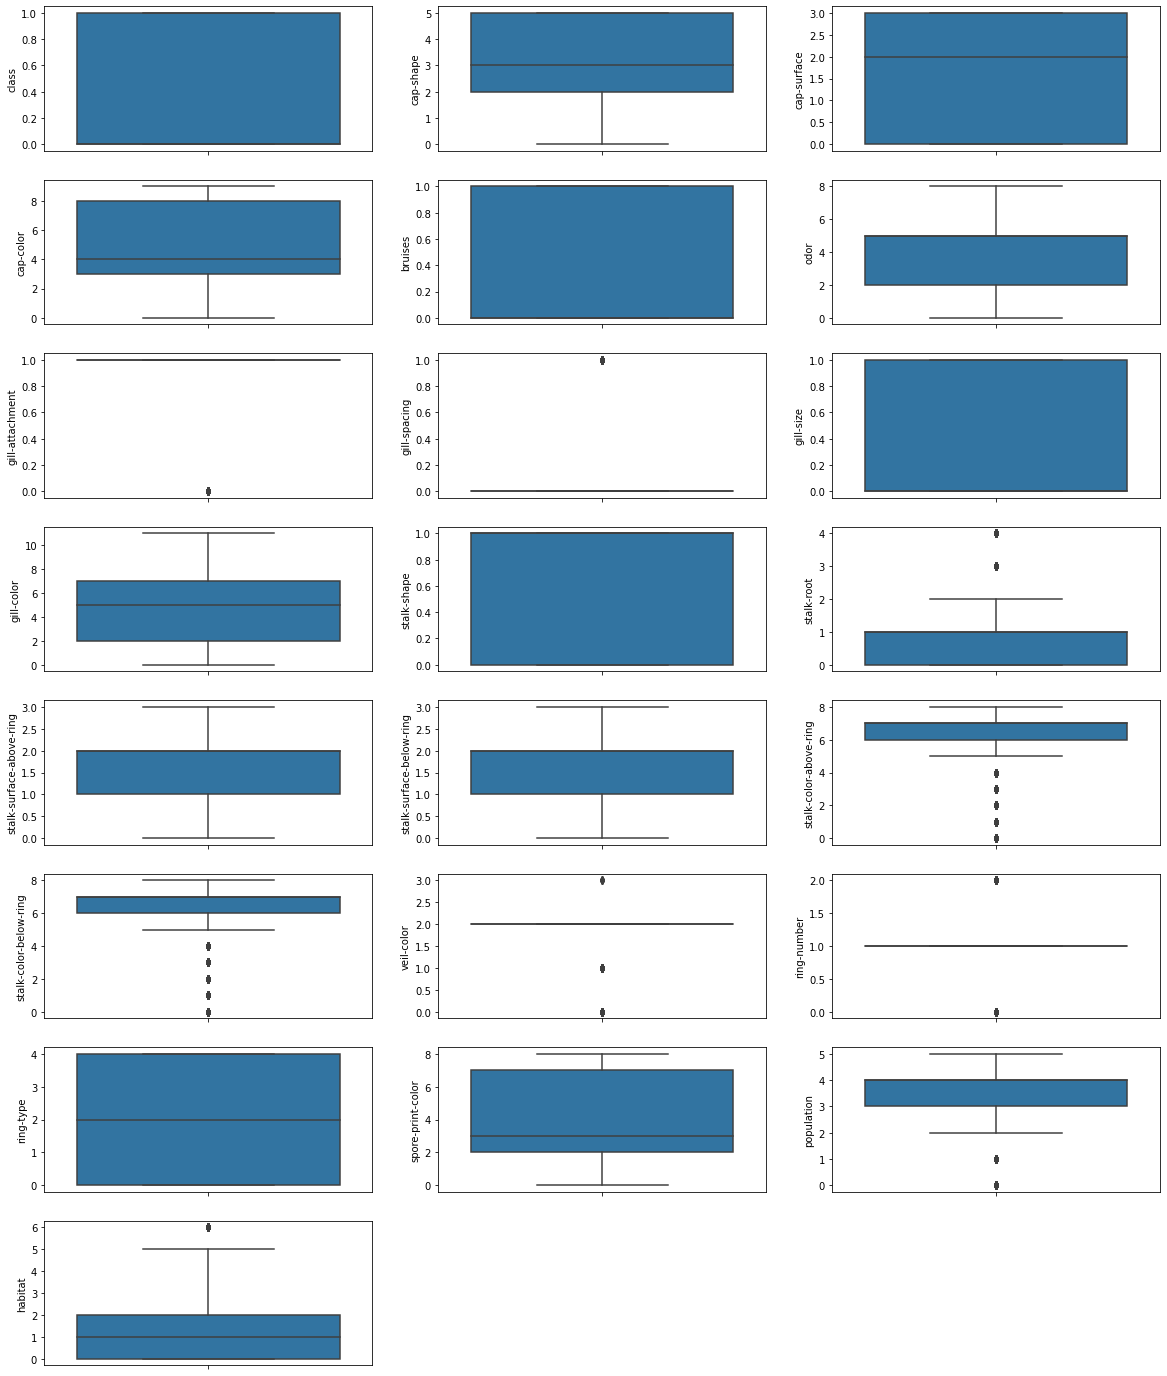

In [24]:
plt.figure(figsize=(20,25))
for o in enumerate(df.columns):
    plt.subplot(8,3,o[0]+1)
    sns.boxplot(y=df[o[1]])

In [25]:
zscore_outliers=np.abs(zscore(df))
threshold=3
print('Outliers:- \n',np.where(zscore_outliers>3))

Outliers:- 
 (array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


Observation:-
    
         we can notice some of columns are present with outliers

### Outliers Removal
#### USING ZSCORE

In [26]:
dfzscore=df[(zscore_outliers<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",dfzscore.shape)

Before removing outliers:: (8124, 22)
After removing outliers:: (6568, 22)


#### USING IQR

In [27]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

3.0

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [29]:
IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR.shape)

(7368, 22)


Observation:- 
    
           1.Using zscore we can see there are 1556 no rows have been removed.
        
           2. Using IQR we can notice 756 no of rows have been remove.
            
         there is huge data loss in "zscore" so considering "IQR" method.   

In [30]:
df=IQR

In [31]:
df.shape

(7368, 22)

#### Skewness removal


In [32]:
df_corr=df.corr()
df_corr['class']

class                       1.000000
cap-shape                   0.048003
cap-surface                 0.229678
cap-color                  -0.100164
bruises                    -0.453470
odor                        0.011268
gill-attachment             0.141747
gill-spacing               -0.323064
gill-size                   0.663361
gill-color                 -0.560530
stalk-shape                 0.022501
stalk-root                 -0.396386
stalk-surface-above-ring   -0.262149
stalk-surface-below-ring   -0.243831
stalk-color-above-ring      0.101815
stalk-color-below-ring      0.109670
veil-color                  0.137999
ring-number                -0.185826
ring-type                  -0.421919
spore-print-color           0.311520
population                  0.265150
habitat                     0.236047
Name: class, dtype: float64

In [33]:
df.skew()

class                       0.287454
cap-shape                  -0.264289
cap-surface                -0.650890
cap-color                   0.757220
bruises                     0.167831
odor                       -0.287627
gill-attachment            -5.951149
gill-spacing                1.683345
gill-size                   0.671269
gill-color                  0.013260
stalk-shape                -0.518298
stalk-root                  0.888640
stalk-surface-above-ring   -1.405504
stalk-surface-below-ring   -1.043816
stalk-color-above-ring     -1.746020
stalk-color-below-ring     -1.665941
veil-color                 -6.595104
ring-number                 3.061449
ring-type                  -0.317257
spore-print-color           0.449652
population                 -1.369097
habitat                     1.023973
dtype: float64

Observation :-
    
         if we remove skewness from column those are highly correlated with target variable that can affect 
         the correlation of these columns so we only remove the skewness from those column, 
         those are skewed and less correlated with target variable  

In [34]:
from sklearn.preprocessing import power_transform

df[['gill-attachment',
    'stalk-shape',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-color',
    'ring-number',
    'population',
    'habitat']]=power_transform(df[['gill-attachment',
    'stalk-shape',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-color',
    'ring-number',
    'population',
    'habitat']],method='yeo-johnson')

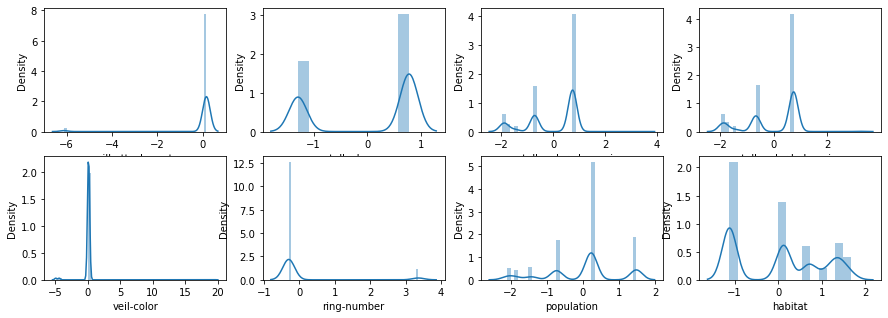

In [35]:
plt.figure(figsize=(15,5))
for i in enumerate(df[['gill-attachment',
    'stalk-shape',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-color',
    'ring-number',
    'population',
    'habitat']]):
    plt.subplot(2,4,i[0]+1)
    sns.distplot(df[i[1]])

In [36]:
df.skew()

class                       0.287454
cap-shape                  -0.264289
cap-surface                -0.650890
cap-color                   0.757220
bruises                     0.167831
odor                       -0.287627
gill-attachment            -5.951149
gill-spacing                1.683345
gill-size                   0.671269
gill-color                  0.013260
stalk-shape                -0.518298
stalk-root                  0.888640
stalk-surface-above-ring   -1.405504
stalk-surface-below-ring   -1.043816
stalk-color-above-ring     -0.767430
stalk-color-below-ring     -0.693229
veil-color                  5.391577
ring-number                 3.061449
ring-type                  -0.317257
spore-print-color           0.449652
population                 -0.363188
habitat                     0.124594
dtype: float64

Observation:-
     
         we can see here most of the skewness has been removed

## Model, predict and estimate the result:



In [37]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Dividing data into X and Y

In [38]:
X=df.drop(['class'], axis=1)
Y=df['class']

### Splitting the data for training and testing


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.20)

## Decision tree classifier

In [40]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

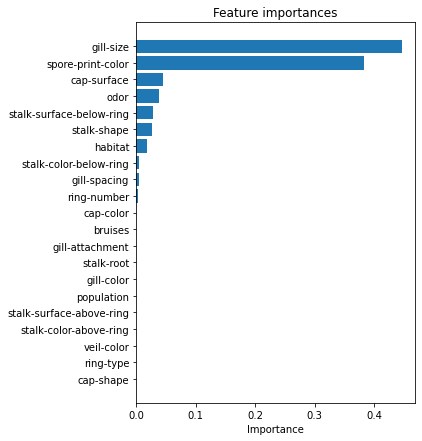

In [41]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

Feature importances:

By all methods examined before, the feature that is most important is "gill-color".

In [42]:
y_pred=clf.predict(x_test)


In [43]:
print("Decision Tree Classifier report \n", classification_report(y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1474
   macro avg       1.00      1.00      1.00      1474
weighted avg       1.00      1.00      1.00      1474



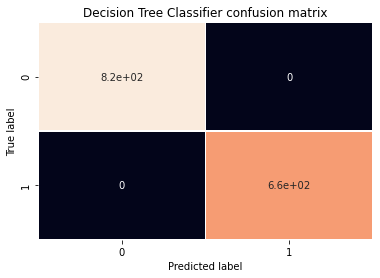

In [44]:
cfm=confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Decision Tree Classifier resulted 100% accuracy and precision!! That's clearly overfitting! :...(

In the code below 10-fold cross validation is performed for different depths of the tree and the accuracy is computed. The accuracy on the test set seems to plateau when the depth is 10.


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(accuracy_score(y_test,rfpred))
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

1.0
[[819   0]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1474
   macro avg       1.00      1.00      1.00      1474
weighted avg       1.00      1.00      1.00      1474



In [46]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0,algorithm='SAMME.R')#####default 
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
print(accuracy_score(y_test,adpred))
print(confusion_matrix(y_test,adpred))
print(classification_report(y_test,adpred))

1.0
[[819   0]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1474
   macro avg       1.00      1.00      1.00      1474
weighted avg       1.00      1.00      1.00      1474



#### all above classifier resulted 100% accuracy and precision!! That's clearly overfitting! :...(

lets try with Gaussian Naive Bayes (GaussianNB)

## Gaussian Naive Bayes (GaussianNB)

In [47]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(x_train, y_train)

In [48]:
y_pred_GNB=clf_GNB.predict(x_test)
cfm=confusion_matrix(y_test, y_pred_GNB)
                

Text(0.5, 15.0, 'Predicted label')

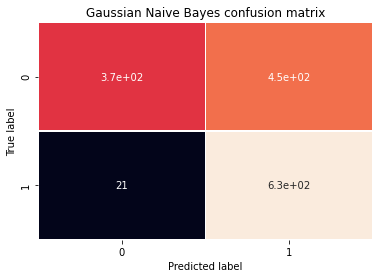

In [49]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [50]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(y_test, y_pred_GNB))


Test data- Gaussian Naive Bayes report 
               precision    recall  f1-score   support

           0       0.95      0.45      0.61       819
           1       0.59      0.97      0.73       655

    accuracy                           0.68      1474
   macro avg       0.77      0.71      0.67      1474
weighted avg       0.79      0.68      0.66      1474



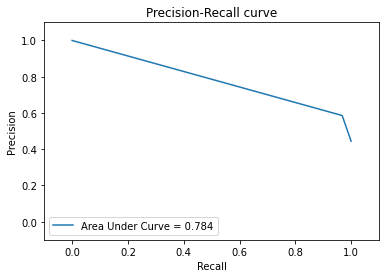

In [51]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_GNB)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

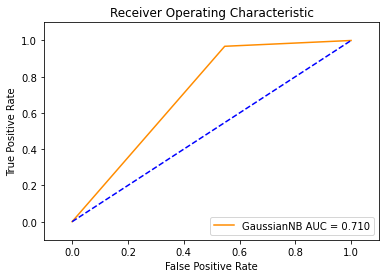

In [52]:
def roc_curve_acc(y_test, y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test,y_pred_GNB, "GaussianNB")

Obsevation:- 
    
         According to the all result Gaussian Naive Bayes (GaussianNB) will be the perfect model for prediction.
         
         all other model were overfit.

## saving the model

In [53]:
import joblib

In [54]:
joblib.dump(y_pred_GNB,'ML_MASHROOMS_Predictions_Project')

['ML_MASHROOMS_Predictions_Project']